# Hypothesis Testing

## A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.
- Dataset File : Cutlets.csv

## Problem Statement
- Alternative Hypothesis: There is significant difference in the diameter of cutlets
- Null Hypothesis: There is no significant difference in the diameter of cutlets from different unit
- H0 -> µ1 = µ2
- Ha -> µ1 ≠ µ2

## The above is 2 Sample Independent - two different units preparing cutlets

In [1]:
#import the libraries
import pandas as pd
import scipy 
import numpy as np
from scipy import stats

In [2]:
cutlet_df=pd.read_csv("Cutlets.csv")

In [3]:
cutlet_df.head(5)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
cutlet_df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [5]:
cutlet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [6]:
#Importing t-test for independent samples as the above is 2 Sample Independent,i.e.two different units preparing cutlets
from scipy.stats import ttest_ind

In [7]:
t_stat , p_value = ttest_ind(cutlet_df['Unit A'],cutlet_df['Unit B'])

In [8]:
p_value

0.4722394724599501

In [9]:
# Alpha is not given so we assume it to be 0.05
if p_value < 0.05:
    print('Null Hypothesis is Rejected , Assumption made is to be true')
else:
    print('Null Hypothesis failed to Reject , Assumption made is not true')

Null Hypothesis failed to Reject , Assumption made is not true


# Conclusion :
## Therefore , There is no significant difference in the diameter of cutlets from different unit

## ----------------------------------------------------------------------------------------------------------------------------------

## A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
- Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
- Dataset File: LabTAT.csv


## Problem Statement
- Null Hypothesis: There is no difference in average TAT of each lab , µ1=µ2=µ3=µ4
- Alternative Hypothesis: Atleast one average TAT of one lab is different

In [10]:
lab_df=pd.read_csv("LabTAT.csv")

In [11]:
lab_df.head(5)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [12]:
lab_df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [13]:
lab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


## The above is 4 Samples which are Independent - we use Anova f-test

In [14]:
#Anova ftest statistics: stats.f_oneway(lab-1,lab-2,lab-3,lab-4)
f_stat,p_value_lab=stats.f_oneway(lab_df.iloc[:,0],lab_df.iloc[:,1],lab_df.iloc[:,2],lab_df.iloc[:,3])

In [15]:
# Alpha is given to be 0.05
if p_value_lab < 0.05:
    print('Null Hypothesis is Rejected , Assumption made is to be true')
else:
    print('Null Hypothesis failed to Reject , Assumption made is not true')

Null Hypothesis is Rejected , Assumption made is to be true


# Conclusion :
## Therefore , Atleast one average TAT of one lab is different

## ----------------------------------------------------------------------------------------------------------------------------------

## Sales of products in four different regions is tabulated for males and females. Find if male-female buyer ratios are similar across regions.
- Dataset File - Buyer Ratio.csv

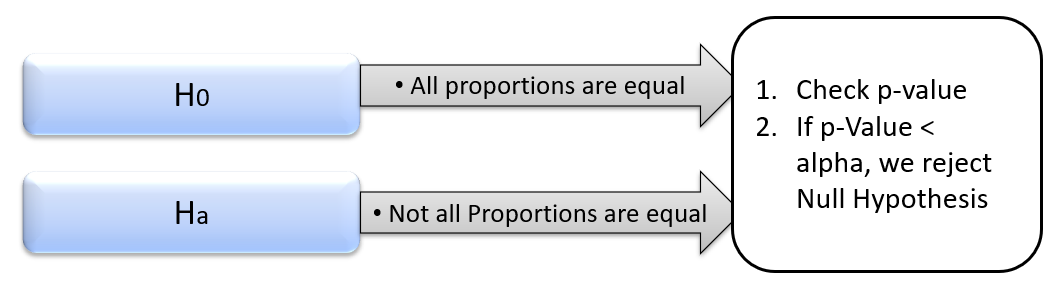


## Problem Statement
- Null Hypothesis:There is No Dependence among the variables i.e.There is no difference in male-female buyer ratios , p1=p2=p3=p4
- Alternative Hypothesis: There is Dependence among the variables i.e.There is significant difference in male-female buyer ratios

In [16]:
buyer_df=pd.read_csv('BuyerRatio.csv')

In [17]:
buyer_df

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [18]:
buyer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [19]:
males_count=np.array(buyer_df.iloc[0,1:5])
males_count

array([50, 142, 131, 70], dtype=object)

In [20]:
females_count=np.array(buyer_df.iloc[1,1:5])
females_count

array([435, 1523, 1356, 750], dtype=object)

## The above has Proportions/Ratios dependency to be checked - we use Chi-Square contengency independence test

In [21]:
observed_values=[males_count,females_count]
observed_values

[array([50, 142, 131, 70], dtype=object),
 array([435, 1523, 1356, 750], dtype=object)]

In [22]:
chi_stat,p_value_ratio,dof_ratio,expected_values=stats.chi2_contingency(observed_values)
# Syntax : chi2_contingency(observed_values)
# Ouput :chi2 : The test statistic,
# p_value : The p-value of the test,dof : Degrees of freedom, expected : expected values table

In [23]:
expected_values

array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]])

In [24]:
dof_ratio #Degrees of Freedom

3

In [25]:
pd.DataFrame(expected_values,index=['Male','Female'],columns=['East','West','North','South'])#Displaying Expected Values

,East,West,North,South
Male,42.765313,146.812879,131.117568,72.304241
Female,442.234687,1518.187121,1355.882432,747.695759


In [26]:
# Alpha is not given so we assume it to be 0.05
if p_value_ratio < 0.05:
    print('Null Hypothesis is Rejected , Assumption made is to be true')
else:
    print('Null Hypothesis failed to Reject , Assumption made is not true')

Null Hypothesis failed to Reject , Assumption made is not true


# Conclusion :
## Therefore , There is No Dependence among the variables i.e.There is no difference in male-female buyer ratios , p1=p2=p3=p4

## ----------------------------------------------------------------------------------------------------------------------------------

## TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences
- Dataset file : CustomerOrderForm.csv

## Problem Statement
- Null Hypothesis: There is No Dependence among the variables i.e.There is no difference in Non_Defective and Defective ratios accross countries , p1=p2=p3=p4
- Alternative Hypothesis: There is Dependence among the variables i.e.There is difference in Non_Defective and Defective ratios accross countries

In [27]:
customer_df = pd.read_csv('Costomer+OrderForm.csv')

In [28]:
customer_df

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [29]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [30]:
pd.DataFrame(customer_df.Phillippines.value_counts())

,Phillippines
Error Free,271
Defective,29


In [31]:
observed_values_table=pd.concat([pd.DataFrame(customer_df.Phillippines.value_counts()),pd.DataFrame(customer_df.Indonesia.value_counts()),pd.DataFrame(customer_df.Malta.value_counts()),pd.DataFrame(customer_df.India.value_counts())],axis=1)
observed_values_table

,Phillippines,Indonesia,Malta,India
Error Free,271,267,269,280
Defective,29,33,31,20


In [32]:
Error_Free_count=np.array(observed_values_table.iloc[0,0:4])
Error_Free_count

array([271, 267, 269, 280], dtype=int64)

In [33]:
defective_count=np.array(observed_values_table.iloc[1,0:4])
defective_count

array([29, 33, 31, 20], dtype=int64)

In [34]:
observed_values=[Error_Free_count,defective_count]

## The above has Proportions/Ratios dependency to be checked - we use Chi-Square contengency independence test

In [35]:
chi_stat,p_value_ratio,dof_ratio,expected_values=stats.chi2_contingency(observed_values)
# Syntax : chi2_contingency(observed_values)
# Ouput :chi2 : The test statistic,
# p_value : The p-value of the test,dof : Degrees of freedom, expected : expected values table

In [36]:
expected_values

array([[271.75, 271.75, 271.75, 271.75],
       [ 28.25,  28.25,  28.25,  28.25]])

In [37]:
pd.DataFrame(expected_values,index=['Error Free','Defective'],columns=['Phillippines','Indonesia','Malta','India'])
#Displaying Expected Values

,Phillippines,Indonesia,Malta,India
Error Free,271.75,271.75,271.75,271.75
Defective,28.25,28.25,28.25,28.25


In [38]:
dof_ratio #Degrees of Freedom

3

In [39]:
# Alpha is given to be 0.05
if p_value_ratio < 0.05:
    print('Null Hypothesis is Rejected , Assumption made is to be true')
else:
    print('Null Hypothesis failed to Reject , Assumption made is not true')

Null Hypothesis failed to Reject , Assumption made is not true


# Conclusion :
##  Therefore , There is No Dependence among the variables i.e.There is no difference in Non_Defective and Defective ratios accross countries , p1=p2=p3=p4